Text(-45, 0.6, 'Single k → Energy eigenstate\nInfinite extension in space')

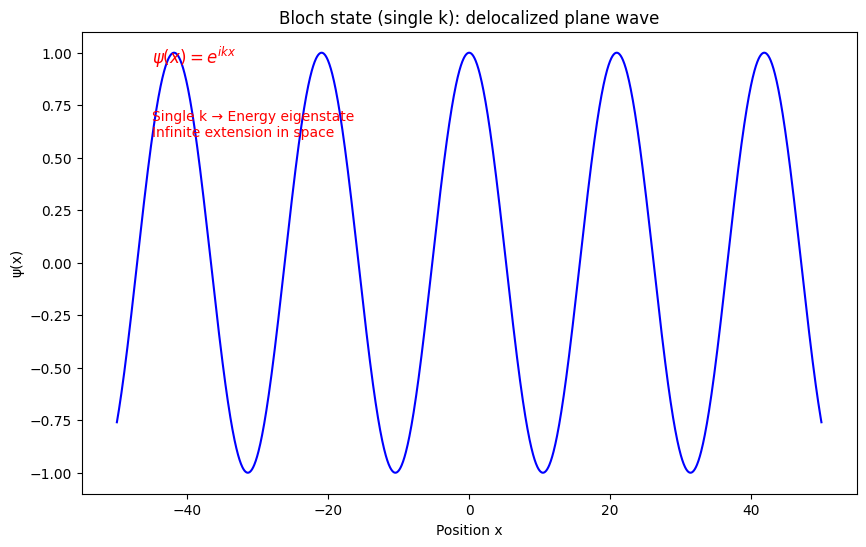

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置空间范围
x = np.linspace(-50, 50, 2000)

# ============ 1. Bloch state (single k) ============
k0 = 0.3
bloch_state = np.exp(1j * k0 * x)  # complex plane wave
bloch_real = np.real(bloch_state)

# ============ Plotting ============
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Bloch state
axes.plot(x, bloch_real, 'b')
axes.set_title("Bloch state (single k): delocalized plane wave", fontsize=12)
axes.set_xlabel("Position x")
axes.set_ylabel("ψ(x)")
axes.text(-45, 0.95, r"$\psi(x) = e^{ikx}$", fontsize=12, color='red')
axes.text(-45, 0.6, "Single k → Energy eigenstate\nInfinite extension in space", fontsize=10, color='red')



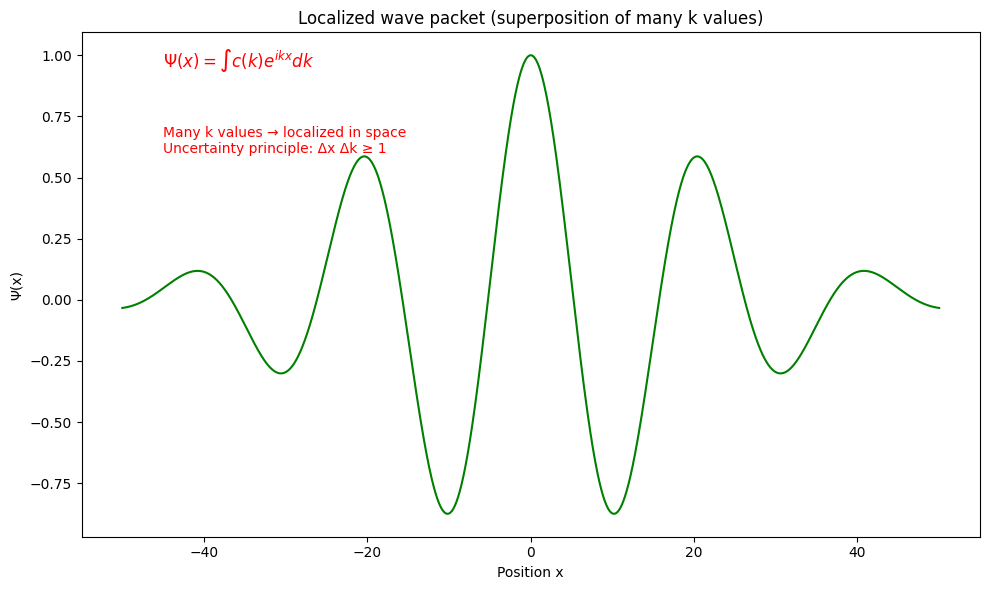

In [2]:

# ============ 2. Wave packet (superposition of k values) ============
# Gaussian distribution in k-space
k0=0.3
dk = 0.05
k_vals = np.linspace(k0 - 0.3, k0 + 0.3, 400)
# print(k_vals)
weights = np.exp(-(k_vals - k0)**2 / (2 * dk**2))

# Construct superposition (Fourier-like)
wave_packet = np.zeros_like(x, dtype=complex)
for ki, wi in zip(k_vals, weights):
    wave_packet += wi * np.exp(1j * ki * x)
wave_packet_real = np.real(wave_packet / np.max(np.abs(wave_packet)))

# ============ Plotting ============
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
 
# Wave packet
axes.plot(x, wave_packet_real, 'g')
axes.set_title("Localized wave packet (superposition of many k values)", fontsize=12)
axes.set_xlabel("Position x")
axes.set_ylabel("Ψ(x)")
axes.text(-45, 0.95, r"$\Psi(x) = \int c(k) e^{ikx} dk$", fontsize=12, color='red')
axes.text(-45, 0.6, "Many k values → localized in space\nUncertainty principle: Δx Δk ≥ 1", fontsize=10, color='red')

plt.tight_layout()
plt.show()

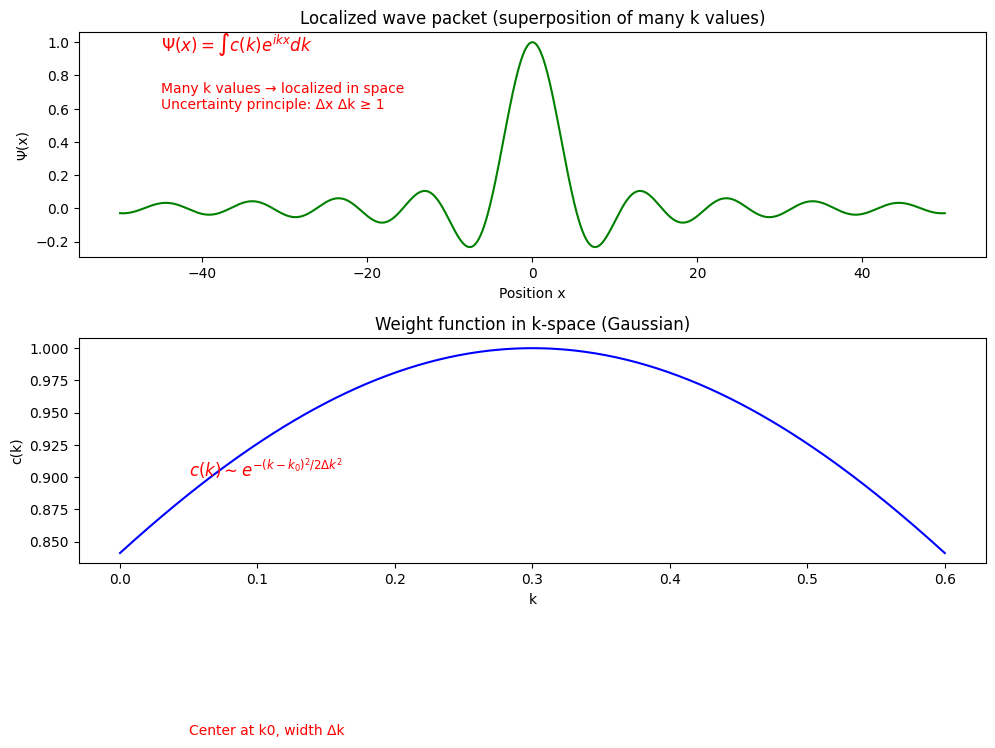

In [3]:
# 设置空间范围
x = np.linspace(-50, 50, 2000)

# ============ Wave packet (superposition of k values) ============
k0 = 0.3
dk = 0.51
k_vals = np.linspace(k0 - 0.3, k0 + 0.3, 400)
weights = np.exp(-(k_vals - k0)**2 / (2 * dk**2))

# 构造波包
wave_packet = np.zeros_like(x, dtype=complex)
for ki, wi in zip(k_vals, weights):
    wave_packet += wi * np.exp(1j * ki * x)
wave_packet_real = np.real(wave_packet / np.max(np.abs(wave_packet)))

# ============ 绘图 ============
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 波包
axes[0].plot(x, wave_packet_real, 'g')
axes[0].set_title("Localized wave packet (superposition of many k values)", fontsize=12)
axes[0].set_xlabel("Position x")
axes[0].set_ylabel("Ψ(x)")
axes[0].text(-45, 0.95, r"$\Psi(x) = \int c(k) e^{ikx} dk$", fontsize=12, color='red')
axes[0].text(-45, 0.6, "Many k values → localized in space\nUncertainty principle: Δx Δk ≥ 1", fontsize=10, color='red')

# 权重函数 c(k)
axes[1].plot(k_vals, weights, 'b')
axes[1].set_title("Weight function in k-space (Gaussian)", fontsize=12)
axes[1].set_xlabel("k")
axes[1].set_ylabel("c(k)")
axes[1].text(k0-0.25, 0.9, r"$c(k) \sim e^{-(k-k_0)^2 / 2\Delta k^2}$", fontsize=12, color='red')
axes[1].text(k0-0.25, 0.7, "Center at k0, width Δk", fontsize=10, color='red')

plt.tight_layout()
plt.show()

In [4]:
# Symbolic derivation of the Gaussian wave‑packet Fourier transform
import sympy as sp

# Define symbols
k, k0, x, dk = sp.symbols('k k0 x dk', positive=True, real=True)
I = sp.I

# Define the integrand: exp(-(k-k0)^2/(2*dk^2)) * exp(I*k*x)
integrand = sp.exp(- (k - k0)**2 / (2*dk**2)) * sp.exp(I*k*x)

# Do the integral over k from -inf to +inf
Psi = sp.integrate(integrand, (k, -sp.oo, sp.oo))

# Simplify the result
Psi_simplified = sp.simplify(Psi)

Psi, Psi_simplified


(sqrt(2)*sqrt(pi)*dk*(2 - erfc(sqrt(2)*I*dk*x/2))*exp(-dk**2*x**2/2)*exp(I*k0*x)/2 + sqrt(2)*sqrt(pi)*dk*exp(-dk**2*x**2/2)*exp(I*k0*x)*erfc(sqrt(2)*I*dk*x/2)/2,
 sqrt(2)*sqrt(pi)*dk*exp(x*(-dk**2*x/2 + I*k0)))

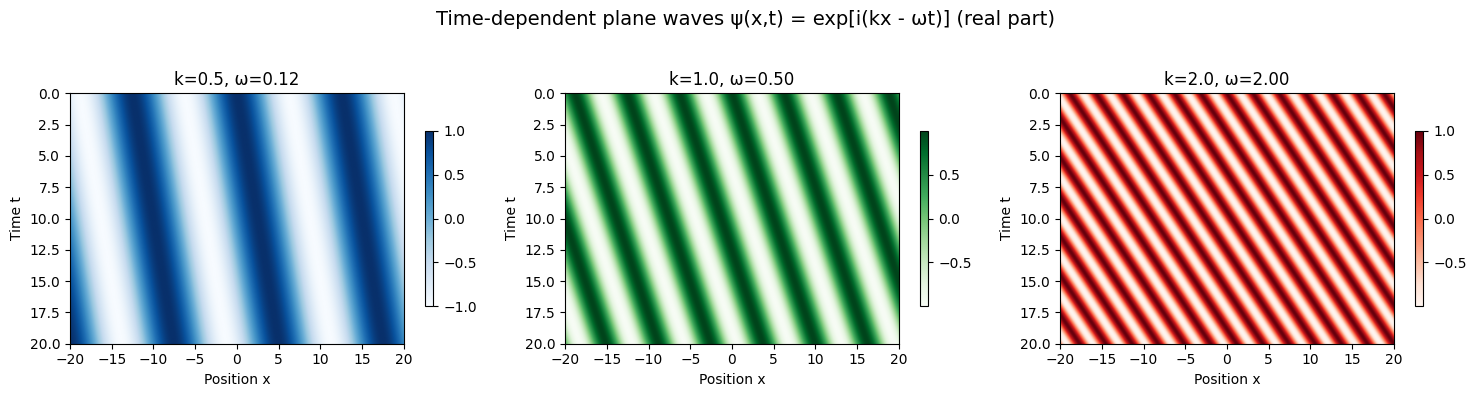

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 空间和时间范围
x = np.linspace(-20, 20, 400)
t = np.linspace(0, 20, 300)
X, T = np.meshgrid(x, t)

# 定义几个不同的波矢和能量（通过k控制频率）
k_values = [0.5, 1.0, 2.0]   # 波矢
colors = ['Blues', 'Greens', 'Reds']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, k, cmap in zip(axes, k_values, colors):
    # 对应能量 E = hbar^2 k^2 / 2m，这里设 hbar=1, m=1
    omega =  k**2 / 2
    psi = np.cos(k*X - omega*T)  # 取实部来可视化
    
    im = ax.imshow(psi, extent=[x.min(), x.max(), t.max(), t.min()],
                   aspect='auto', cmap=cmap)
    ax.set_title(f"k={k}, ω={omega:.2f}")
    ax.set_xlabel("Position x")
    ax.set_ylabel("Time t")
    fig.colorbar(im, ax=ax, shrink=0.7)

plt.suptitle("Time-dependent plane waves ψ(x,t) = exp[i(kx - ωt)] (real part)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 统计规律

### 麦克斯韦-玻尔兹曼分布
### 玻色-爱因斯坦分布
### 费米-狄拉克分布

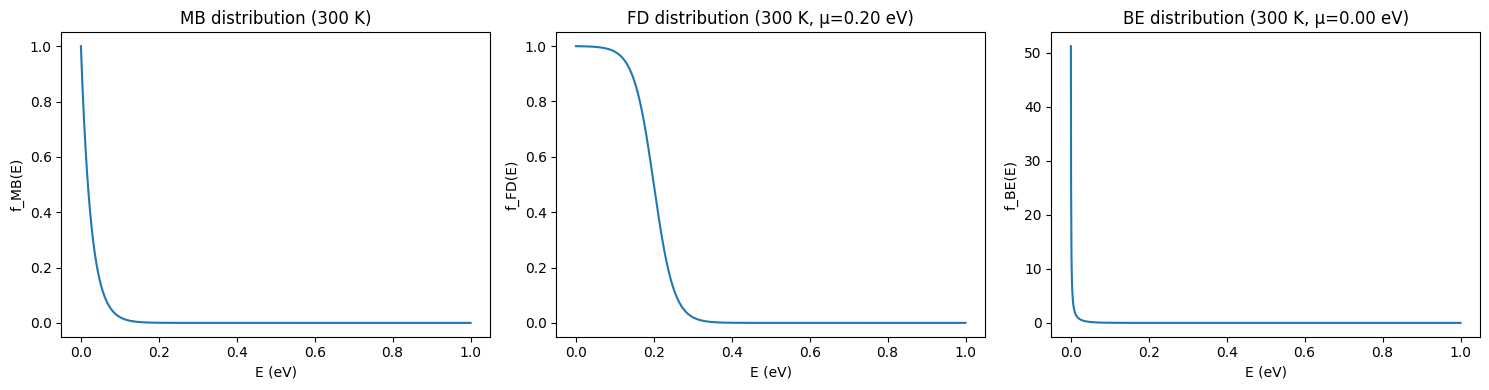

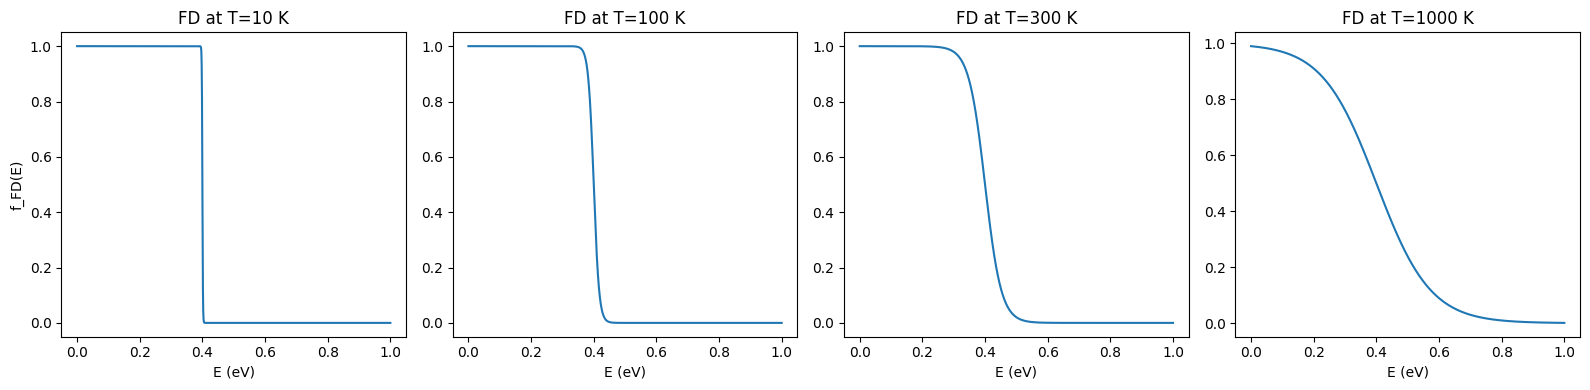

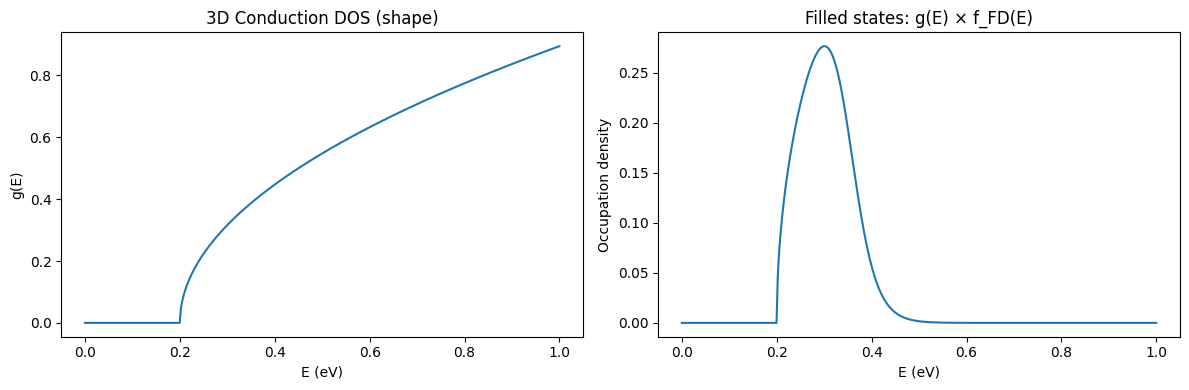

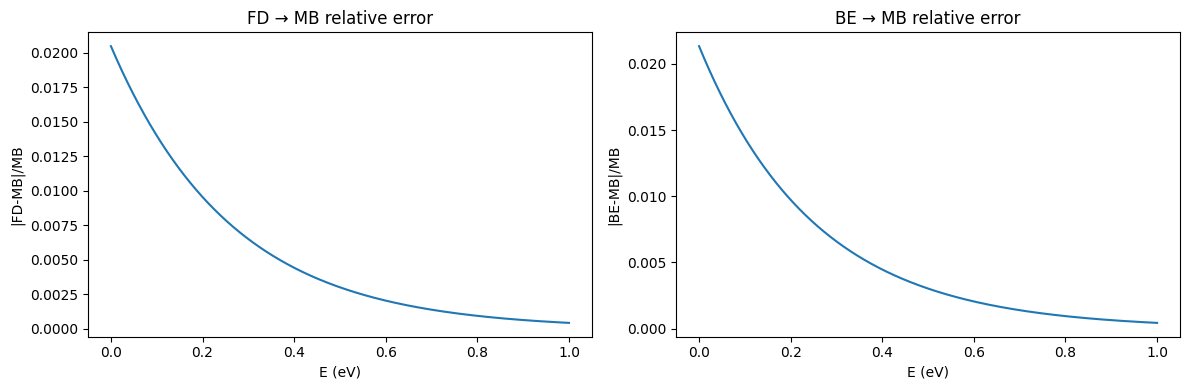

In [13]:
import numpy as np
import matplotlib.pyplot as plt

kB = 8.617333262145e-5  # eV/K

# ---------- Distributions ----------
def f_mb(E, T, mu=0.0):
    beta = 1.0 / (kB * T)
    return np.exp(-(E - mu) * beta)

def f_fd(E, T, mu=0.0):
    beta = 1.0 / (kB * T)
    x = (E - mu) * beta
    out = np.empty_like(x, dtype=float)
    mask_hi = x > 30
    out[mask_hi] = np.exp(-x[mask_hi])
    mask_lo = x < -30
    out[mask_lo] = 1.0 - np.exp(x[mask_lo])
    mask_mid = ~(mask_hi | mask_lo)
    out[mask_mid] = 1.0 / (np.exp(x[mask_mid]) + 1.0)
    return out

def f_be(E, T, mu=0.0):
    beta = 1.0 / (kB * T)
    x = (E - mu) * beta
    out = np.empty_like(x, dtype=float)
    eps = 1e-12
    x_clipped = np.clip(x, -700, 700)
    denom = np.expm1(x_clipped)
    bad = x <= 0.0
    out[bad] = np.nan
    good = ~bad
    out[good] = 1.0 / denom[good]
    return out

def dos_3d_free(E, Ec=0.0):
    x = E - Ec
    g = np.zeros_like(E)
    mask = x > 0
    g[mask] = np.sqrt(x[mask])
    return g

# ---------- Energy range ----------
E = np.linspace(0.0, 1.0, 2000)

# ===========================
# 1) MB, FD, BE comparison
# ===========================
T = 300
mu_fd, mu_be = 0.2, 0.0
fMB = f_mb(E, T)
fFD = f_fd(E, T, mu_fd)
fBE = f_be(E, T, mu_be)

fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].plot(E, fMB)
axs[0].set_title("MB distribution (300 K)")
axs[0].set_xlabel("E (eV)"); axs[0].set_ylabel("f_MB(E)")
axs[1].plot(E, fFD)
axs[1].set_title(f"FD distribution (300 K, μ={mu_fd:.2f} eV)")
axs[1].set_xlabel("E (eV)"); axs[1].set_ylabel("f_FD(E)")
axs[2].plot(E, fBE)
axs[2].set_title(f"BE distribution (300 K, μ={mu_be:.2f} eV)")
axs[2].set_xlabel("E (eV)"); axs[2].set_ylabel("f_BE(E)")
plt.tight_layout(); plt.show()

# ===========================
# 2) FD at different T
# ===========================
mu = 0.4
temps = [10, 100, 300, 1000]
fig, axs = plt.subplots(1, len(temps), figsize=(16,4))
for i,Ttest in enumerate(temps):
    axs[i].plot(E, f_fd(E, Ttest, mu))
    axs[i].set_title(f"FD at T={Ttest} K")
    axs[i].set_xlabel("E (eV)"); 
    if i==0: axs[i].set_ylabel("f_FD(E)")
plt.tight_layout(); plt.show()

# ===========================
# 3) DOS and filled DOS
# ===========================
Ec = 0.2; mu_c = 0.35
E2 = np.linspace(0.0, 1.0, 2000)
gC = dos_3d_free(E2, Ec=Ec)
fFD2 = f_fd(E2, 300, mu_c)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(E2, gC)
axs[0].set_title("3D Conduction DOS (shape)")
axs[0].set_xlabel("E (eV)"); axs[0].set_ylabel("g(E)")
axs[1].plot(E2, gC*fFD2)
axs[1].set_title("Filled states: g(E) × f_FD(E)")
axs[1].set_xlabel("E (eV)"); axs[1].set_ylabel("Occupation density")
plt.tight_layout(); plt.show()

# ===========================
# 4) MB limit check (FD, BE)
# ===========================
T_check = 3000; mu_check = -1.0
fFD_lim = f_fd(E, T_check, mu_check)
fMB_lim = f_mb(E, T_check, mu_check)
fBE_lim = f_be(E, T_check, mu_check)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(E, np.abs(fFD_lim - fMB_lim)/(fMB_lim+1e-30))
axs[0].set_title("FD → MB relative error")
axs[0].set_xlabel("E (eV)"); axs[0].set_ylabel("|FD-MB|/MB")
axs[1].plot(E, np.abs(fBE_lim - fMB_lim)/(fMB_lim+1e-30))
axs[1].set_title("BE → MB relative error")
axs[1].set_xlabel("E (eV)"); axs[1].set_ylabel("|BE-MB|/MB")
plt.tight_layout(); plt.show()
